In this project, I have used multiple algorithms like linear regression, artificial neural network (ANN), random forest and decision tree.

### INPUT FEATURES

* GRE Score (out of 340)
* TOEFL Score (out of 120)
* University Rating (out of 5)
* Statement of Purpose (SOP)
* Letter of Recommendation (LOR) Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)

### OUTPUT:

    Chance of Admission (ranging from 0 to 1)

In [60]:
import pandas as pd  
import numpy as np   
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [ ]:
admission_df = pd.read_csv(r"admission_predict.csv")

In [4]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission_df.drop('Serial No.', axis = 1, inplace = True) # inplace: so that it is removed from memory

In [6]:
admission_df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
131,303,105,5,5.0,4.5,8.65,0,0.77


In [7]:
# checking for null values
admission_df.isnull().sum()   # summation(counts) of all the null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
# getting information about the dataframe
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [9]:
# statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
# IGNORE
# group by University Ranking
university_df = admission_df.groupby(by = 'University Rating')
university_df

In [11]:
# group by University Ranking
university_df = admission_df.groupby(by = 'University Rating').mean()
university_df

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


### Data Visualizations

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

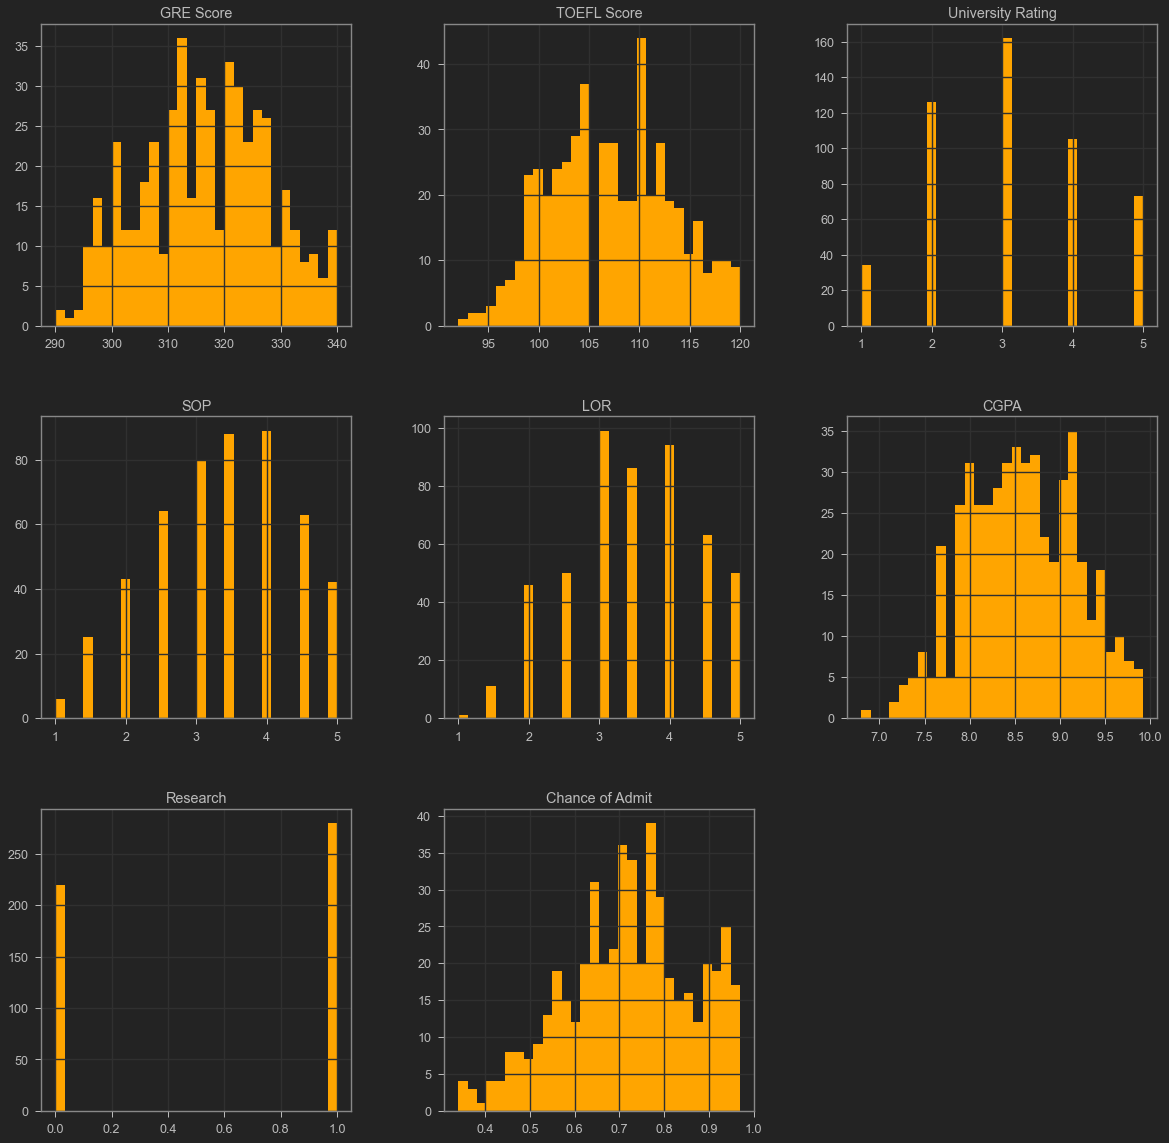

In [23]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'orange')
# BINS parameter represents no. of bins data will be divided to
#admission_df.hist(bins = 30, figsize = (20,20), color = 'r')

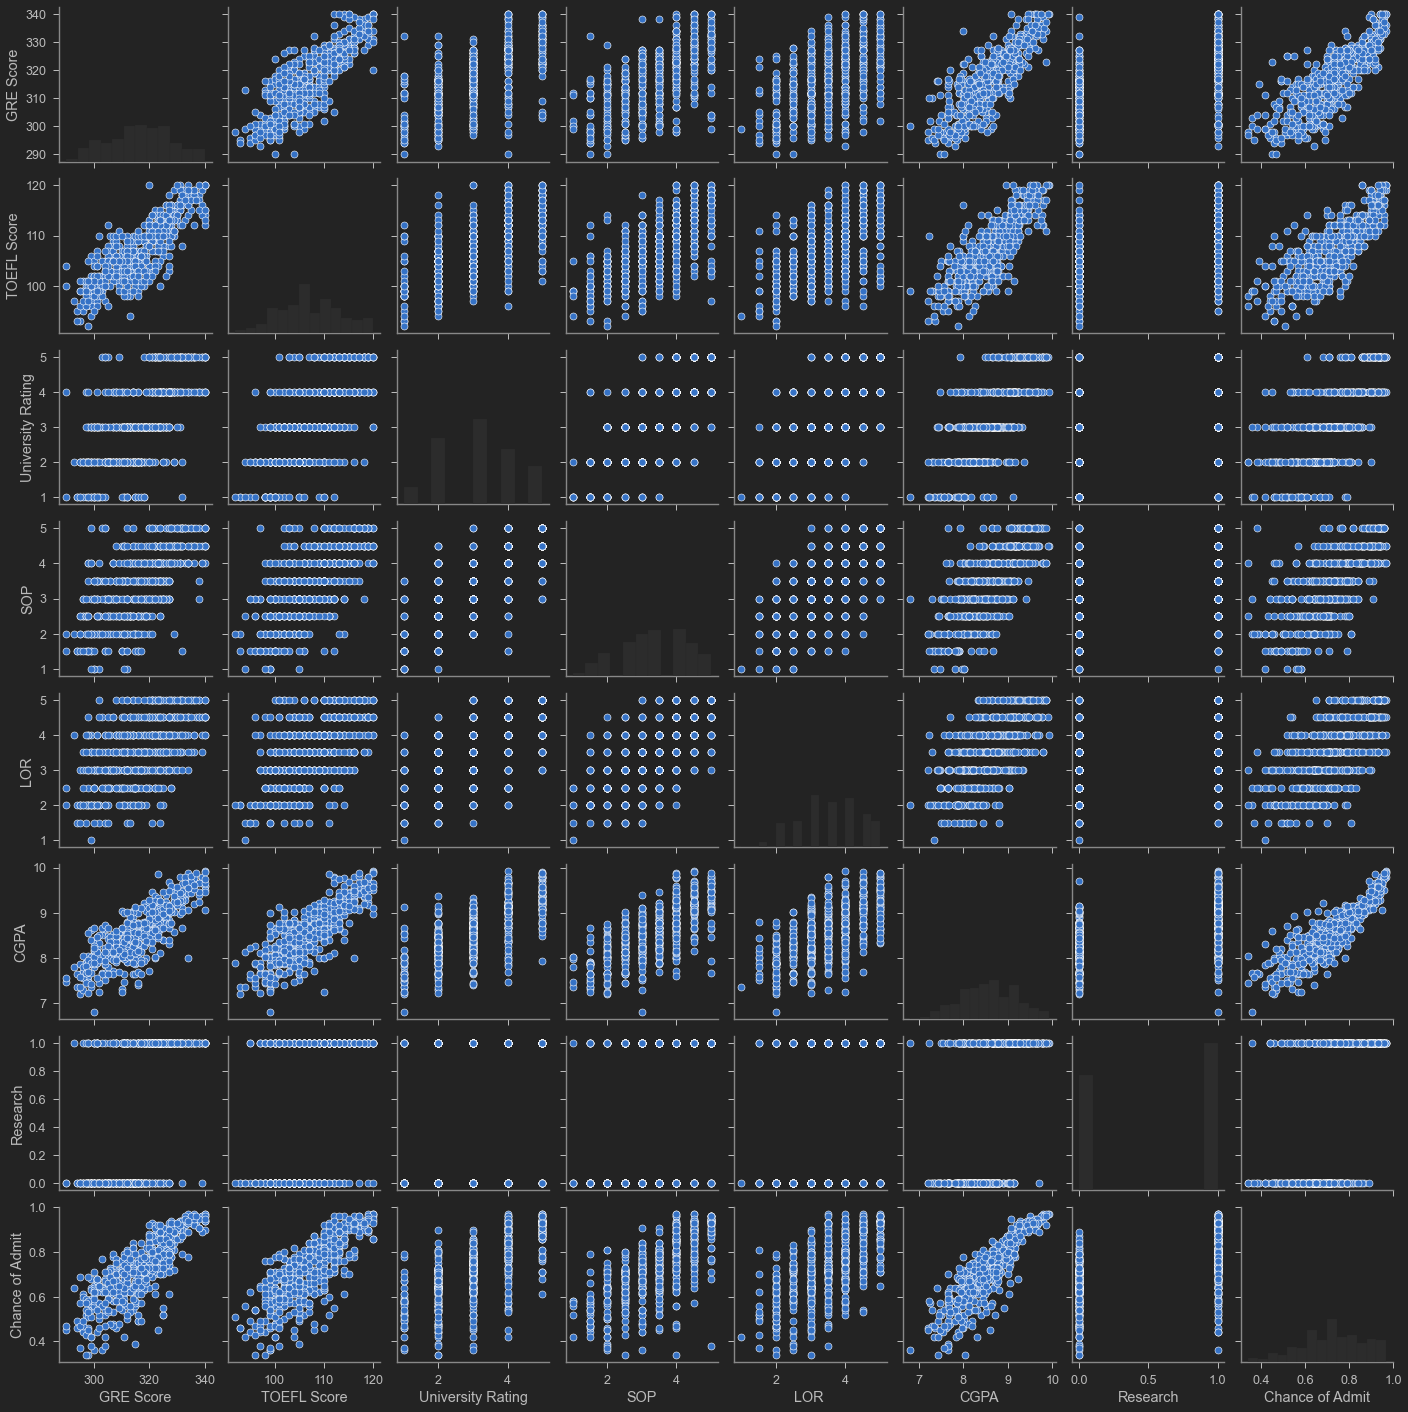

In [24]:
sns.pairplot(admission_df)
# can look at any type of relationship through pairplot

From the above pairplot we can see POSITIVE correlation b/w the GRE and the TOEFL 

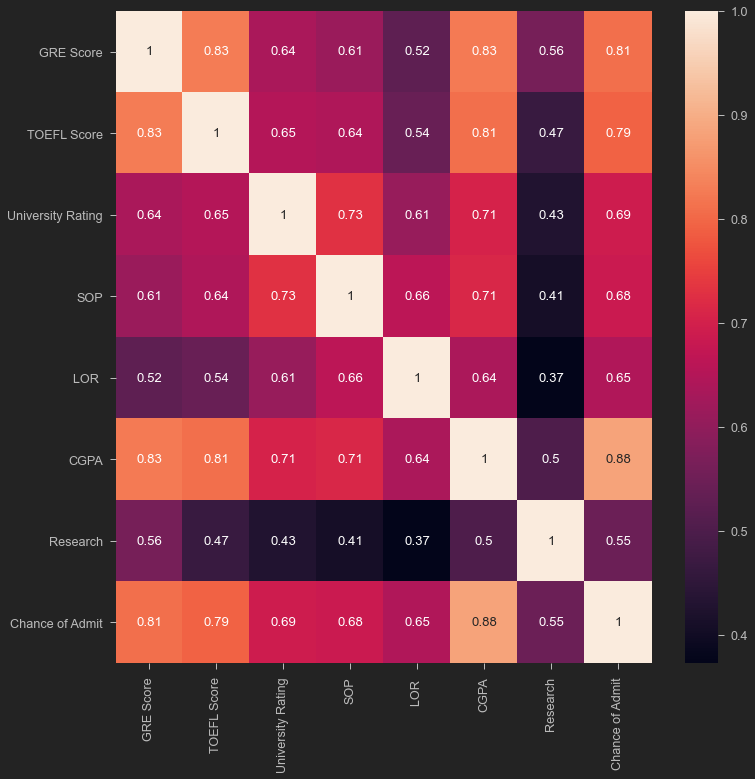

In [25]:
# correlation matrix, heatmap
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)   # annot: so that numbers are shown in the heatmap
plt.show()

From the Heatmap we observe that generally student who has high GRE score also has high TOEFL score

#### Creating Testing and Training Dataset

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [61]:
X = admission_df.drop(columns = ['Chance of Admit'])  # independant variable
y = admission_df['Chance of Admit']

In [62]:
X.shape

(500, 7)

In [63]:
y.shape

(500,)

In [64]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [65]:
# converting into numpy array
X = np.array(X)
y = np.array(y)

In [66]:
# reshaping y so that we can use scki-kit learn for training & testing 
y = y.reshape(-1,1)
y.shape

(500, 1)

#### Feature Scaling

*Done so that the model is not biased, to maintain consistency b/w various features*

In [67]:
# scaling the data before training the model

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [68]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [69]:
# splitting the data into training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

### Model 1: Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [71]:
accuracy_LinearRegression = regressor.score(X_test, y_test)
accuracy_LinearRegression

0.8179556750835736

*Linear Regression Model has an accuracy of about 81.8 %*

### Model 2: Training and Evaluating an Artificial Neural Network (ANN) Model

In [25]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.optimizers import Adam

**Tensorflow** - Google's ML framework to build , train and deploy ANN and ML models

**Keras** - API , gonna use tensorflow as a backend to our Keras API


**Dense** - Dense ANN layer


**Activation** - can select various Activation func., here we're gonna use ReLU (Rectified Linear Units)


**Dropout** - regularization technique to ensure our network is not overfitting (as the network is being trained, gonna drop some of their neurons which will ensure that Neurons don't develop any dependency among each other)

In [26]:
ANN_model = keras.Sequential()   
# First layer
ANN_model.add(Dense(50, input_dim = 7))     # 50 neurons, input_dim = 7 as 7 parameters in the dataset
ANN_model.add(Activation('relu'))           # using ReLU activation function

# adding another layer
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5)) # dropout=0.5 =>gonna drop 50% neurons so that network is not overfitting

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
# In the Output layer Activation is gonna be Linear as we're implementing a Regression task
# try to avoid any Activation func in output layer that is saturated, eg: Sigmoid
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [27]:
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [28]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)
# (Update weights/ i/o run over 100 times)
# batch_size => feed data in batch format of 20 samples

Epoch 1/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6122
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3357
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2752
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2851
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2701
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2435
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2538
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.2394
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2123
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 13/100
22/22 [=================

In [30]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.2219
Accuracy : 0.7781208604574203


In [31]:
# Looking at the progression of the network throughout the number of epochs
epochs_hist.history.keys()

dict_keys(['loss'])

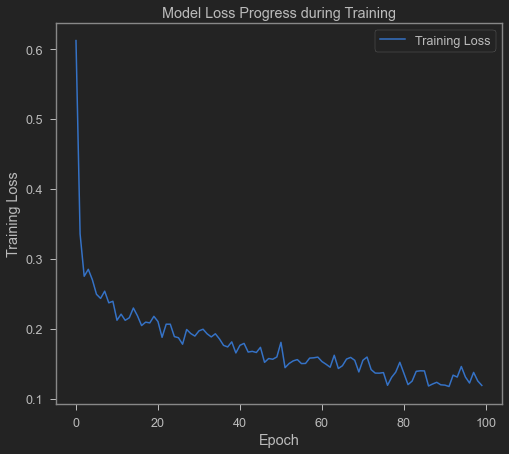

In [32]:
# loss => progression of network throughout the no. of epochs
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])  # for label/box in the plot

*77.8% accuracy of ANN model*

### Model 3: Decision Tree Model

In [91]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

In [34]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
# Checking the accuracy of Decision Tree Regressor
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.7503175054172758

##### *Accuracy of Decision Tree Model is 75.03 %*

### Model 4: Random Forest Model

In [92]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [36]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)#n_estimators=>no of Trees
RandomForest_model.fit(X_train, y_train)

<ipython-input-36-a780fc7715dd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [37]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
print(accuracy_RandomForest)

0.7988504609885658


*Accuracy of Random Forest Model is 79.8 %*

#### Various Regression KPIs (Key Performance Indicators)

Regression Metrics: How to assess model performance
    (Refer the other notebook for theory)
1. Mean Absolute Error (MAE)
2. Mean Square Error (MSE)
3. Root Mean Square Error (RMSE)
4. R Square (R^2) Coefficient of Determination
5. Adjusted R Square 

### Calculating Regression Model KPIs

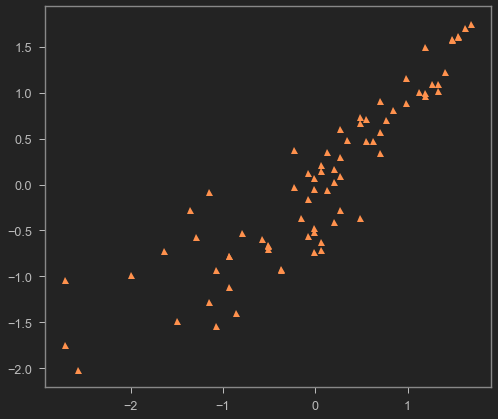

In [38]:
y_predict = regressor.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'y') # '^' means to show data points in a triangular format
#plt.xlabel('y_test (Ground Truth)')

In [39]:
# applying inverse transform to represent the data in its original units
#(as earlier we did feature scaling, gonna reverse that so that data makes sense in its original units)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

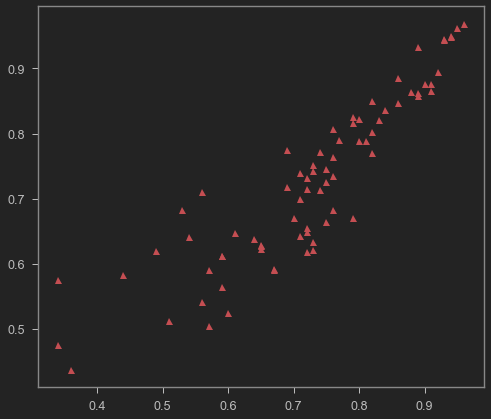

In [40]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [41]:
# obtaining the length of the testing data
k = X_test.shape[1]
n = len(X_test)
n  # no. of samples

75

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

MSE = mean_squared_error(y_test_orig, y_test_orig)
MAE = mean_absolute_error(y_test_orig, y_test_orig)
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_test_orig)), '.3f'))
r2 = r2_score(y_test_orig, y_test_orig)

print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2)

RMSE =  0.0 
MSE =  0.0 
MAE =  0.0 
r2 =  1.0


### Quiz questions


1. It is necessary to drop features that have negative correlation with the target variable?


False. (We cannot drop features that have negative correlations. Negatively correlated features indicate that they are inversely-proportional to the target variable)


2. Should we use "softmax" activation function for regression problems when we build ANNs?


False (Softmax functions are used for Classification tasks)


3. Should we stop training the model if the validation loss keeps on increasing and the training loss keeps on decreasing?


Yes   (this is a case of over-fitting and we should stop the training when this happens)
https://datascience.stackexchange.com/questions/43191/validation-loss-is-not-decreasing


4. Complex non-linear models always out-perform the simple linear models?


False  (Not necessarily, if the data exhibits strong linearity between features, then a simple linear model would out-perform a complex model)

In [170]:
X = [1,2,3,4]
X = np.array(X)
X = X.reshape(-1,1)

print(X.shape)

(4, 1)


In [171]:
# important, numpy arrays
import numpy as np
X = [1,2,3,4]
X = np.array(X)

print(X.shape)

(4,)


In [72]:
import pickle

In [73]:
s = np.array([320, 110, 1, 5, 5, 9, 1])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(7,)
(1, 7)


In [74]:
pickle.dump(regressor, open('regressor.pkl', 'wb'))

In [76]:
model = pickle.load(open('regressor.pkl', 'rb'))
print(model.predict(s))

[[64.40321515]]
